#Adaptado por Bruno Menezes (https://github.com/brunoleomenezes) e será utilizado apenas para fins acadêmicos.

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import mnist

In [2]:
(X_train, y_train),(X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 1s 0us/step


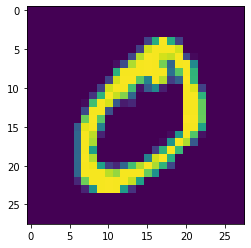

In [3]:
plt.imshow(X_train[1])

In [5]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [6]:
X_input = tf.keras.layers.Input(shape=(28,28,1))
# encoder
X = tf.keras.layers.Conv2D(filters=16, kernel_size=3, strides=2, padding='same')(X_input)
encoded = tf.keras.layers.Conv2D(filters=8, kernel_size=3, strides=2, padding='same')(X)
# espaço latente
# decoder
X = tf.keras.layers.Conv2DTranspose(filters=16, kernel_size=3, strides=2, padding='same')(encoded)
X = tf.keras.layers.Conv2DTranspose(filters=1, kernel_size=3, strides=2, activation='sigmoid', padding='same')(X)

model = tf.keras.models.Model(inputs=X_input, outputs=X)

encoded_input = tf.keras.layers.Input(shape=(7,7,8))
X = model.layers[-2](encoded_input)
X = model.layers[-1](X)

decoder = tf.keras.models.Model(inputs=encoded_input, outputs=X)

model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(lr=0.001))

decoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 7, 7, 8)]         0         
                                                                 
 conv2d_transpose (Conv2DTra  (None, 14, 14, 16)       1168      
 nspose)                                                         
                                                                 
 conv2d_transpose_1 (Conv2DT  (None, 28, 28, 1)        145       
 ranspose)                                                       
                                                                 
Total params: 1,313
Trainable params: 1,313
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [7]:
history = model.fit(X_train, X_train, batch_size=100, validation_split=0.1, epochs=30)

Epoch 1/30
540/540 [==============================] - 15s 5ms/step - loss: 0.0622 - val_loss: 0.0074
Epoch 2/30
540/540 [==============================] - 2s 4ms/step - loss: 0.0072 - val_loss: 0.0070
Epoch 3/30
540/540 [==============================] - 2s 4ms/step - loss: 0.0067 - val_loss: 0.0063
Epoch 4/30
540/540 [==============================] - 2s 5ms/step - loss: 0.0058 - val_loss: 0.0055
Epoch 5/30
540/540 [==============================] - 2s 5ms/step - loss: 0.0049 - val_loss: 0.0044
Epoch 6/30
540/540 [==============================] - 2s 5ms/step - loss: 0.0042 - val_loss: 0.0041
Epoch 7/30
540/540 [==============================] - 2s 4ms/step - loss: 0.0040 - val_loss: 0.0039
Epoch 8/30
540/540 [==============================] - 3s 5ms/step - loss: 0.0039 - val_loss: 0.0039
Epoch 9/30
540/540 [==============================] - 4s 7ms/step - loss: 0.0039 - val_loss: 0.0038
Epoch 10/30
540/540 [==============================] - 3s 5ms/step - loss: 0.0038 - val_loss: 0.003

In [8]:
print(model.layers[3].get_weights()[1])
print(decoder.layers[1].get_weights()[1])

[ 0.03502098 -0.08308267 -0.03485658  0.03824246 -0.1770572   0.07786264
 -0.09999742 -0.04380798  0.04617803 -0.10581758  0.07106038 -0.07099945
  0.06594235 -0.14589463  0.07437038  0.10506365]
[ 0.03502098 -0.08308267 -0.03485658  0.03824246 -0.1770572   0.07786264
 -0.09999742 -0.04380798  0.04617803 -0.10581758  0.07106038 -0.07099945
  0.06594235 -0.14589463  0.07437038  0.10506365]


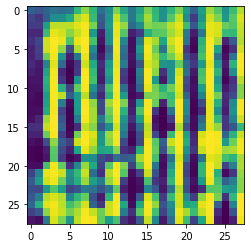

In [9]:
encoded_imgs = np.random.rand(1,7,7,8)
decoded_imgs = decoder.predict(encoded_imgs)

plt.imshow(decoded_imgs.reshape(28, 28))

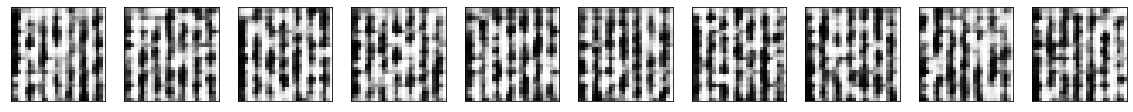

In [10]:
encoded_imgs = np.random.rand(10,7,7,8)
decoded_imgs = decoder.predict(encoded_imgs)

n = 10 
plt.figure(figsize=(20, 4))
for i in range(n):
    
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()